<a href="https://colab.research.google.com/github/Isaac-Guz/IA_IB_AgoDic2024/blob/main/Assignment_6_FFNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Activity**: Artificial Neural Network - feedforward **Student**: Isaac Jair Guzmán Berumen **ID**: 1917725 **Class**: N4-N6 **Group**:002

Step 1: Load libraries

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import random
print(tf.__version__)

2.17.0


Step 2: Load data

In [2]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
class_names = ['Zero', 'One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight', 'Nine', 'Ten']

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [7]:
len(test_labels)

10000

Step 3: Data preprocessing

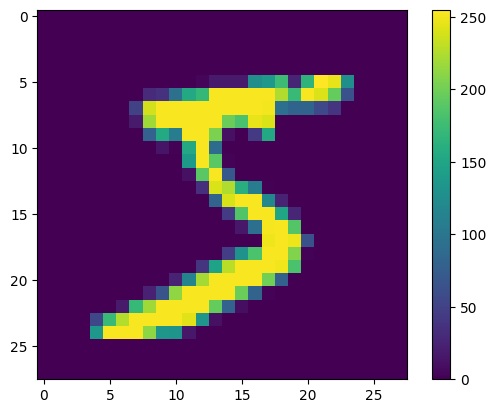

In [8]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [9]:
train_images = train_images / 255.0
test_images = test_images / 255.0

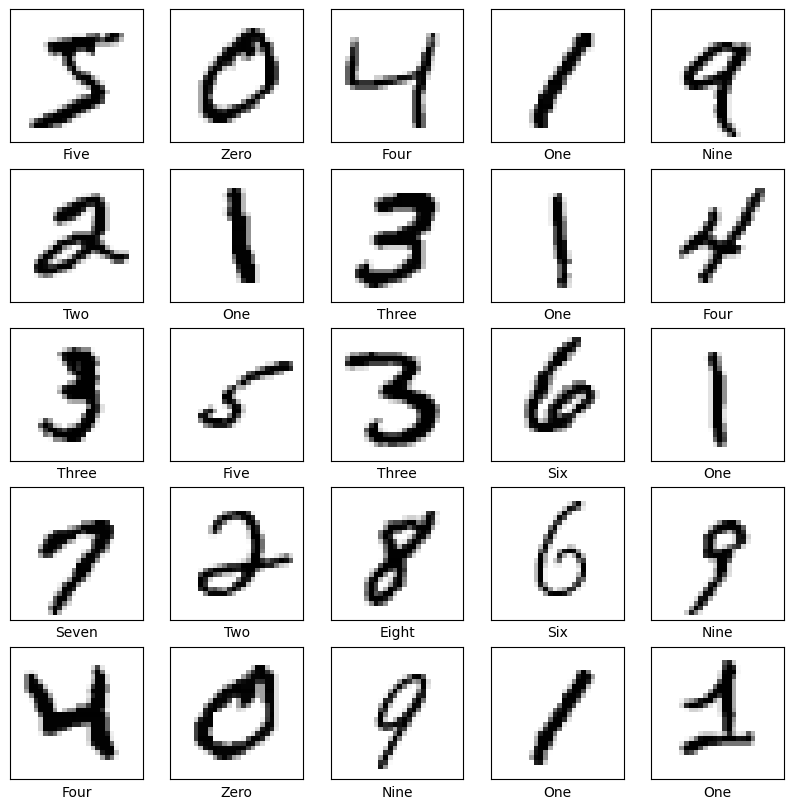

In [10]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [11]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Step 4: Model selection and training

In [13]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8807 - loss: 0.4283
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9638 - loss: 0.1251
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9770 - loss: 0.0767
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9828 - loss: 0.0581
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9878 - loss: 0.0427
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9902 - loss: 0.0336
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9928 - loss: 0.0268
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9939 - loss: 0.0209
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9952 - loss: 0.0172
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9961 - loss: 0.0139


In [14]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - 2ms/step - accuracy: 0.9782 - loss: 0.0774

Test accuracy: 0.9782000184059143


In [15]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [16]:
predictions = probability_model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [17]:
predictions[0]

array([7.1823929e-09, 1.5261886e-10, 7.8577429e-09, 3.9388506e-06,
       1.2811680e-14, 1.8347922e-11, 2.7276096e-14, 9.9999565e-01,
       5.9368692e-09, 3.5856615e-07], dtype=float32)

In [18]:
np.argmax(predictions[0])

7

In [19]:
test_labels[0]

7

Step 5: Model testing

In [20]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

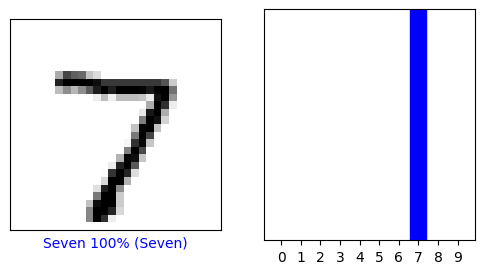

In [21]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

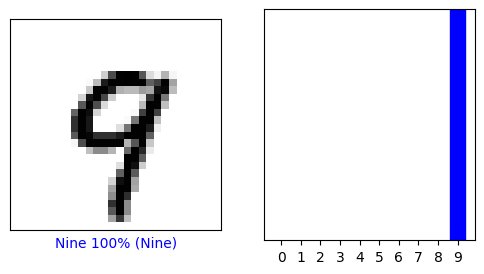

In [22]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

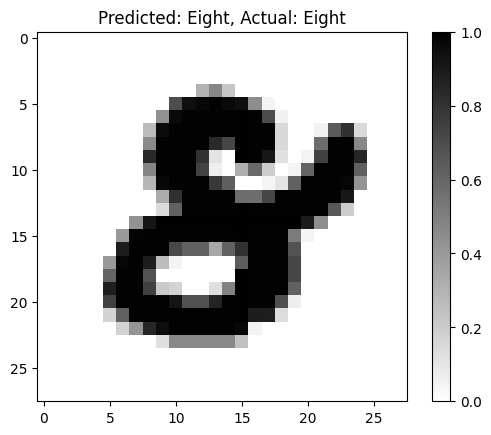

In [23]:
# Function to display a random test image along with its predicted and actual values
def display_random_prediction(test_images, predictions, test_labels, class_names):
    # Selecting a random index
    index = random.randint(0, len(test_images) - 1)
    # Displaying the image
    plt.figure()
    plt.imshow(test_images[index], cmap=plt.cm.binary)
    plt.colorbar()
    plt.grid(False)
    plt.title(f"Predicted: {class_names[np.argmax(predictions[index])]}, Actual: {class_names[test_labels[index]]}")
    plt.show()

# Displaying 5 random predictions
for _ in range(1):
    display_random_prediction(test_images, predictions, test_labels, class_names)

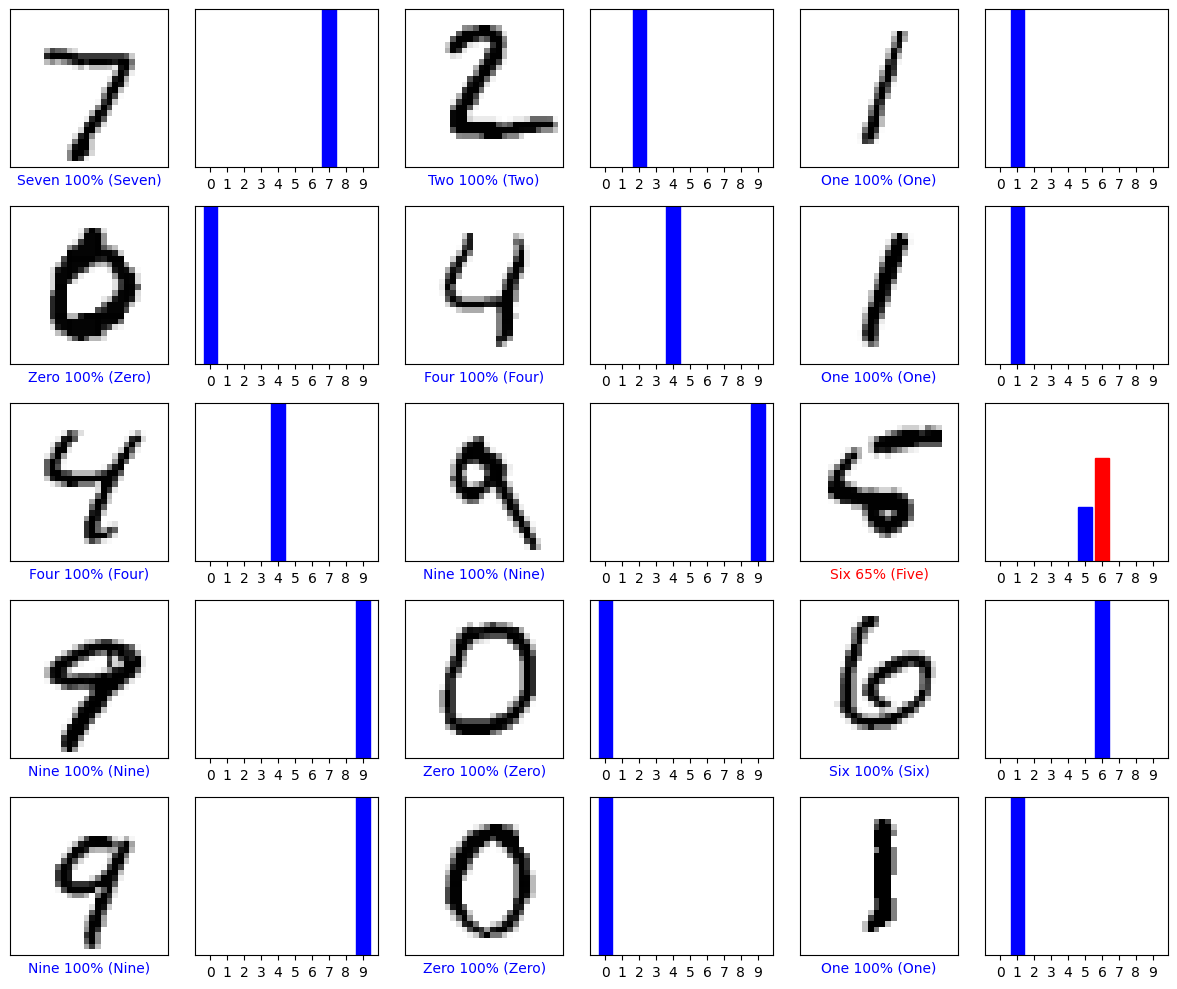

In [24]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [25]:
img = test_images[1]
print(img.shape)

(28, 28)


In [26]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [27]:
predictions_single = model.predict(img)
print(predictions_single)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
[[ -5.1269608   2.0680518  18.762756   -2.9843678 -31.332005   -7.907499
   -2.1801584 -26.883764   -3.5099387 -16.743027 ]]


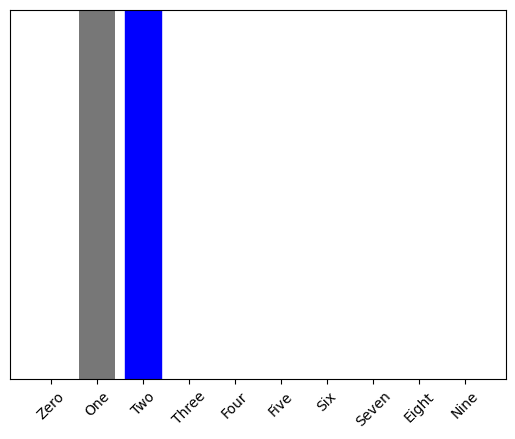

In [28]:
# Plot the value array
plot_value_array(1, predictions_single[0], test_labels)

# Set the correct number of ticks and labels
_ = plt.xticks(range(10), class_names[:10], rotation=45)

# Show the plot
plt.show()

In [29]:
np.argmax(predictions_single[0])

2